# 0. Preâmbulo 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from statsforecast import StatsForecast
from statsforecast.models import (SeasonalNaive, AutoARIMA, AutoETS, Naive)
from datasetsforecast.losses import (mae, mape, mse, mase, rmse, smape)
from tqdm.autonotebook import tqdm

c:\Users\Maria Inês\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


# 1. Importação dos dados intermédios

In [3]:
df_grouped = pd.read_csv('Dados_intermedios/df_nb1.csv')
df_grouped = df_grouped.set_index('index')
df_grouped.columns

Index(['5.2.1 - Antitússicos', '5.2.2 - Expetorantes'], dtype='object')

# 2. Pré-processamento das séries temporais


In [4]:
Y_df = (df_grouped
        .reset_index()
        .rename(columns={'index':'ds', 
                         '5.2.1 - Antitússicos':'antitussicos',
                         '5.2.2 - Expetorantes':'expetorantes'}) 
        )
Y_df.columns.name = None
Y_df = pd.melt(Y_df, id_vars=['ds'])
Y_df = (Y_df
        .rename(columns={'variable':'unique_id', 
                            'value':'y'})
        .filter(['unique_id', 'ds', 'y'])
        )

Y_df['ds'] = pd.to_datetime(Y_df['ds'])
Y_df

,unique_id,ds,y
0,antitussicos,2013-01-01,66.33
1,antitussicos,2013-02-01,172.54
2,antitussicos,2013-03-01,115.52
3,antitussicos,2013-04-01,95.56
4,antitussicos,2013-05-01,52.95
...,...,...,...
241,expetorantes,2022-11-01,869.85
242,expetorantes,2022-12-01,1391.99
243,expetorantes,2023-01-01,1179.48
244,expetorantes,2023-02-01,662.75


In [5]:
print(Y_df.dtypes)

unique_id            object
ds           datetime64[ns]
y                   float64
dtype: object


In [6]:
# Substituir NaN por 0
Y_df = Y_df.fillna(0)

In [7]:
# mudar os nomes das colunas
df = Y_df[Y_df['unique_id'].isin(['antitussicos', 'expetorantes'])]

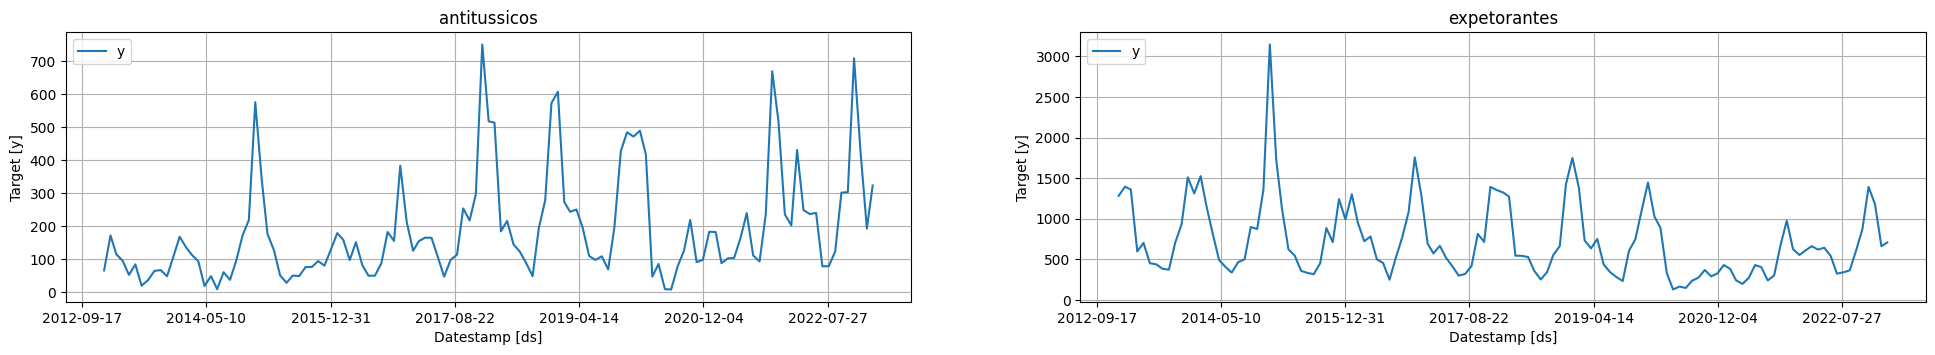

In [8]:
StatsForecast.plot(df)

# 3. Lista de modelos a testar

In [9]:
model_list = [
            Naive(),
            SeasonalNaive(season_length=12),
            AutoETS(season_length=12),
            AutoARIMA(season_length=12),
            AutoARIMA(d=0, season_length=12, alias='ARIMA_D0'), 
            AutoARIMA(d=1, season_length=12, alias='ARIMA_D1')
            ]

sf = StatsForecast(df=Y_df, 
                   models=model_list, 
                   freq='M',
                   n_jobs=-1,
                   fallback_model = SeasonalNaive(season_length=12))


# 4. Avaliação da performance

In [10]:
crossvalidation_df = sf.cross_validation(
    df = df,
    h = 1,
    step_size = 1,
    n_windows = 24
  )

crossvalidation_df

,ds,cutoff,y,Naive,SeasonalNaive,AutoETS,AutoARIMA,ARIMA_D0,ARIMA_D1
unique_id,,,,,,,,,
antitussicos,2021-03-31,2021-02-28,103.150002,88.500000,47.799999,89.765961,-34.249622,-34.249622,10.266952
antitussicos,2021-04-30,2021-03-31,104.220001,103.150002,85.949997,87.672401,113.793190,113.793190,102.381615
antitussicos,2021-05-31,2021-04-30,165.169998,104.220001,9.650000,62.891064,93.674576,60.449364,93.674576
antitussicos,2021-06-30,2021-05-31,240.210007,165.169998,8.700000,46.155758,152.385010,131.646576,152.385010
antitussicos,2021-07-31,2021-06-30,111.800003,240.210007,78.300003,97.955170,218.784866,208.623962,218.784866
antitussicos,2021-08-31,2021-07-31,93.800003,111.800003,126.320000,118.095360,123.731979,94.925346,123.731979
antitussicos,2021-09-30,2021-08-31,238.000000,93.800003,219.600006,188.559448,150.995117,127.676147,150.995117
antitussicos,2021-10-31,2021-09-30,670.469971,238.000000,91.690002,266.812927,246.461746,237.270309,246.461746
antitussicos,2021-11-30,2021-10-31,518.729980,670.469971,98.290001,453.291809,670.469971,593.044617,670.469971


### 4.1. Medidas de Exatidão


### 4.1.1. Antitússicos

In [11]:
ts = crossvalidation_df.query('unique_id == "antitussicos"').reset_index()['y']
f1 = crossvalidation_df.query('unique_id == "antitussicos"').reset_index()['SeasonalNaive']
f2 = crossvalidation_df.query('unique_id == "antitussicos"').reset_index()['AutoETS']
f3 = crossvalidation_df.query('unique_id == "antitussicos"').reset_index()['AutoARIMA']
f4 = crossvalidation_df.query('unique_id == "antitussicos"').reset_index()['ARIMA_D0']
f5 = crossvalidation_df.query('unique_id == "antitussicos"').reset_index()['ARIMA_D1']


eval = pd.DataFrame({
    'rmse': [rmse(ts, f1), rmse(ts, f2), rmse(ts, f3), rmse(ts, f4), rmse(ts, f5)],
    'mae': [mae(ts, f1), mae(ts, f2), mae(ts, f3), mae(ts, f4), mae(ts, f5)],
    'mape': [mape(ts, f1), mape(ts, f2), mape(ts, f3), mape(ts, f4), mape(ts, f5)],
}, index=crossvalidation_df.columns[4:])
eval


,rmse,mae,mape
SeasonalNaive,205.471024,144.664566,53.376079
AutoETS,174.965454,121.459251,47.014204
AutoARIMA,166.549332,120.015625,47.480509
ARIMA_D0,174.780716,129.825363,51.273221
ARIMA_D1,165.250916,117.838478,45.373061


### 4.1.2. Expetorantes

In [12]:
ts = crossvalidation_df.query('unique_id == "expetorantes"').reset_index()['y']
f1 = crossvalidation_df.query('unique_id == "expetorantes"').reset_index()['SeasonalNaive']
f2 = crossvalidation_df.query('unique_id == "expetorantes"').reset_index()['AutoETS']
f3 = crossvalidation_df.query('unique_id == "expetorantes"').reset_index()['AutoARIMA']
f4 = crossvalidation_df.query('unique_id == "expetorantes"').reset_index()['ARIMA_D0']
f5 = crossvalidation_df.query('unique_id == "expetorantes"').reset_index()['ARIMA_D1']

eval = pd.DataFrame({
    'rmse': [rmse(ts, f1), rmse(ts, f2), rmse(ts, f3), rmse(ts, f4), rmse(ts, f5)],
    'mae': [mae(ts, f1), mae(ts, f2), mae(ts, f3), mae(ts, f4), mae(ts, f5)],
    'mape': [mape(ts, f1), mape(ts, f2), mape(ts, f3), mape(ts, f4), mape(ts, f5)],
}, index=crossvalidation_df.columns[4:])
eval

,rmse,mae,mape
SeasonalNaive,317.157104,236.933762,37.601972
AutoETS,251.320786,199.717468,34.405136
AutoARIMA,236.522980,160.770889,28.549826
ARIMA_D0,236.522980,160.770889,28.549826
ARIMA_D1,285.123108,245.436279,48.066092


In [13]:
crossvalidation_df.to_csv('crossvalidationT.csv')

## 4.2. Ajustar o modelo

### 4.2.1. AutoARIMA

#### 4.2.1.1. Antitússicos

In [14]:
model_list_AutoARIMA = [AutoARIMA(season_length=12)]

sf = StatsForecast(df=Y_df.query('unique_id == "antitussicos"'), 
                   models=model_list_AutoARIMA, 
                   freq='M',
                   n_jobs=-1)

In [15]:
df_aux = Y_df.query('unique_id == "antitussicos"').reset_index(drop=True)
forecasts_df = sf.forecast(df=df_aux, h=1, level=[95,80])

df_faux = forecasts_df.reset_index()
df_faux.ds = df_faux.ds + pd.offsets.MonthBegin()

df_aux_all = pd.concat([df_aux,df_faux])

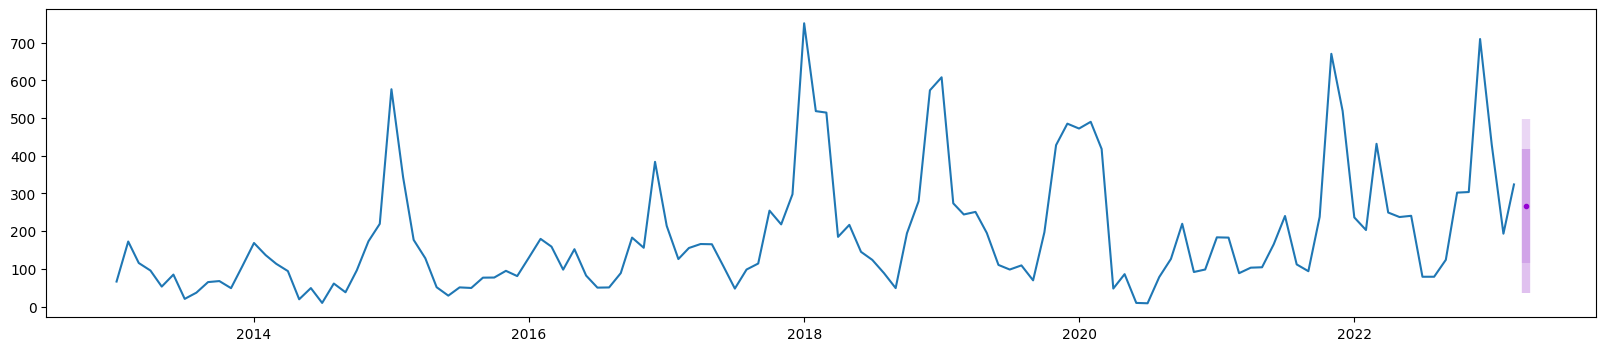

In [16]:
df_y = df_aux_all.set_index('ds').filter(['y'])
df_f = df_aux_all.set_index('ds').iloc[:,[2]]
lo_80 = df_aux_all.iloc[-1,4]
hi_80 = df_aux_all.iloc[-1,6]
lo_95 = df_aux_all.iloc[-1,5]
hi_95 = df_aux_all.iloc[-1,7]

fig, ax = plt.subplots(1,1, figsize=(20,4))
ax.plot(df_y)
ax.plot(df_f, marker='.', color='darkviolet')
ax.fill_between(x=df_f.index[-1:], y1=lo_80, y2=hi_80, color='darkorchid', alpha=0.3, linewidth=6)
ax.fill_between(x=df_f.index[-1:], y1=lo_95, y2=hi_95, color='darkorchid', alpha=0.2, linewidth=6)
plt.show()

### 4.2.2. AutoARIMA_D0

#### 4.2.2.1. Expetorantes

In [17]:
model_list_AutoARIMA0 = [AutoARIMA(d=0, season_length=12, alias='ARIMA_D0')]

sf = StatsForecast(df=Y_df.query('unique_id == "expetorantes"'), 
                   models=model_list_AutoARIMA0, 
                   freq='M',
                   n_jobs=-1)

In [18]:
df_aux = Y_df.query('unique_id == "expetorantes"').reset_index(drop=True)
forecasts_df = sf.forecast(df=df_aux, h=1, level=[95,80])

df_faux = forecasts_df.reset_index()
df_faux.ds = df_faux.ds + pd.offsets.MonthBegin()

df_aux_all = pd.concat([df_aux,df_faux])

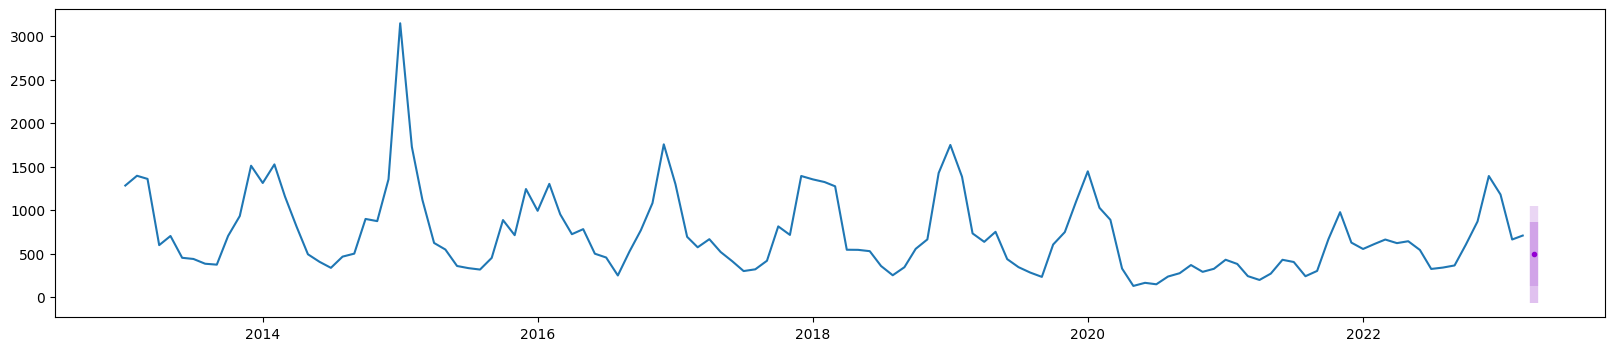

In [19]:
df_y = df_aux_all.set_index('ds').filter(['y'])
df_f = df_aux_all.set_index('ds').iloc[:,[2]]
lo_80 = df_aux_all.iloc[-1,4]
hi_80 = df_aux_all.iloc[-1,6]
lo_95 = df_aux_all.iloc[-1,5]
hi_95 = df_aux_all.iloc[-1,7]

fig, ax = plt.subplots(1,1, figsize=(20,4))
ax.plot(df_y)
ax.plot(df_f, marker='.', color='darkviolet')
ax.fill_between(x=df_f.index[-1:], y1=lo_80, y2=hi_80, color='darkorchid', alpha=0.3, linewidth=6)
ax.fill_between(x=df_f.index[-1:], y1=lo_95, y2=hi_95, color='darkorchid', alpha=0.2, linewidth=6)
plt.show()